In [ ]:
## Github Path
# https://github.com/numenta/NAB/blob/master/data/realAWSCloudwatch/elb_request_count_8c0756.csv

In [1]:
!wget https://raw.githubusercontent.com/numenta/NAB/master/data/realAWSCloudwatch/elb_request_count_8c0756.csv

--2022-09-30 14:51:46--  https://raw.githubusercontent.com/numenta/NAB/master/data/realAWSCloudwatch/elb_request_count_8c0756.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101052 (99K) [text/plain]
Saving to: 'elb_request_count_8c0756.csv.1'

elb_request_count_8 100%[===================>]  98.68K  --.-KB/s    in 0.03s   

2022-09-30 14:51:46 (2.99 MB/s) - 'elb_request_count_8c0756.csv.1' saved [101052/101052]



In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

In [3]:
data = pd.read_csv('elb_request_count_8c0756.csv')

In [4]:
data.head()

,timestamp,value
0,2014-04-10 00:04:00,94.0
1,2014-04-10 00:09:00,56.0
2,2014-04-10 00:14:00,187.0
3,2014-04-10 00:19:00,95.0
4,2014-04-10 00:24:00,51.0


In [5]:
data.describe()

,value
count,4032.000000
mean,61.837054
std,56.664703
min,1.000000
25%,15.000000
50%,48.000000
75%,89.000000
max,656.000000


In [7]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  4032 non-null   datetime64[ns]
 1   value      4032 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 63.1 KB


<AxesSubplot:xlabel='timestamp', ylabel='value'>

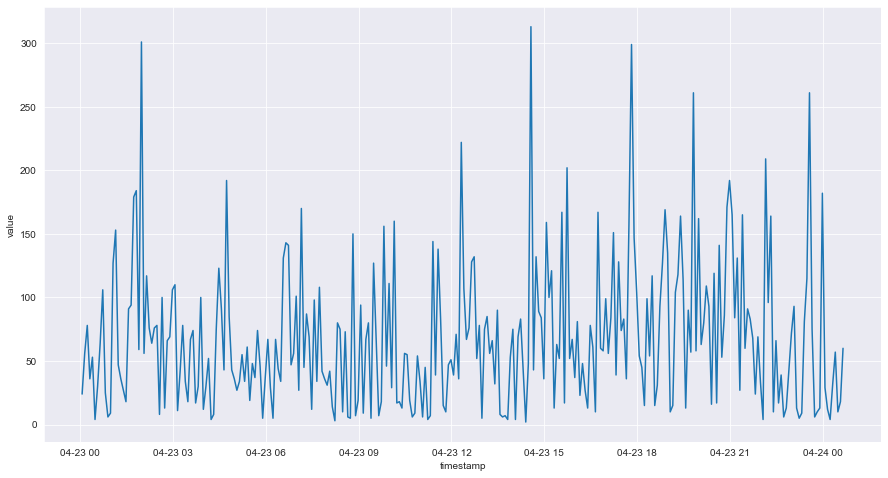

In [21]:
plt.figure(figsize=(15,8))
sns.lineplot(data=data[data['timestamp'] > '2014-04-23'] , x='timestamp', y='value')

In [28]:
data['value'].shift()

0        94.0
1        56.0
2       187.0
3        95.0
4        51.0
        ...  
4027     32.0
4028     57.0
4029     10.0
4030     18.0
4031     60.0
Name: value, Length: 4032, dtype: float64

In [30]:
window_size = 5
for i in range(window_size):
    data['pred_' + str(i+1)] = data['value'].shift(i+1)
data

,timestamp,value,pred_1,pred_2,pred_3,pred_4,pred_5
0,2014-04-10 00:04:00,94.0,NaN,NaN,NaN,NaN,NaN
1,2014-04-10 00:09:00,56.0,94.0,NaN,NaN,NaN,NaN
2,2014-04-10 00:14:00,187.0,56.0,94.0,NaN,NaN,NaN
3,2014-04-10 00:19:00,95.0,187.0,56.0,94.0,NaN,NaN
4,2014-04-10 00:24:00,51.0,95.0,187.0,56.0,94.0,NaN
...,...,...,...,...,...,...,...
4027,2014-04-24 00:19:00,32.0,4.0,12.0,29.0,182.0,13.0
4028,2014-04-24 00:24:00,57.0,32.0,4.0,12.0,29.0,182.0
4029,2014-04-24 00:29:00,10.0,57.0,32.0,4.0,12.0,29.0
4030,2014-04-24 00:34:00,18.0,10.0,57.0,32.0,4.0,12.0


In [32]:
data.dropna(inplace=True)

In [33]:
data

,timestamp,value,pred_1,pred_2,pred_3,pred_4,pred_5
5,2014-04-10 00:29:00,10.0,51.0,95.0,187.0,56.0,94.0
6,2014-04-10 00:34:00,49.0,10.0,51.0,95.0,187.0,56.0
7,2014-04-10 00:39:00,79.0,49.0,10.0,51.0,95.0,187.0
8,2014-04-10 00:44:00,24.0,79.0,49.0,10.0,51.0,95.0
9,2014-04-10 00:49:00,73.0,24.0,79.0,49.0,10.0,51.0
...,...,...,...,...,...,...,...
4027,2014-04-24 00:19:00,32.0,4.0,12.0,29.0,182.0,13.0
4028,2014-04-24 00:24:00,57.0,32.0,4.0,12.0,29.0,182.0
4029,2014-04-24 00:29:00,10.0,57.0,32.0,4.0,12.0,29.0
4030,2014-04-24 00:34:00,18.0,10.0,57.0,32.0,4.0,12.0


In [41]:
X = data.drop(columns=['timestamp']).to_numpy()

In [42]:
X

array([[ 10.,  51.,  95., 187.,  56.,  94.],
       [ 49.,  10.,  51.,  95., 187.,  56.],
       [ 79.,  49.,  10.,  51.,  95., 187.],
       ...,
       [ 10.,  57.,  32.,   4.,  12.,  29.],
       [ 18.,  10.,  57.,  32.,   4.,  12.],
       [ 60.,  18.,  10.,  57.,  32.,   4.]])

In [43]:
from sklearn.ensemble import IsolationForest

In [45]:
forest = IsolationForest()
lables = forest.fit_predict(X)

In [46]:
lables

array([1, 1, 1, ..., 1, 1, 1])

In [47]:
data['forest_anomaly'] = lables

In [48]:
data

,timestamp,value,pred_1,pred_2,pred_3,pred_4,pred_5,forest_anomaly
5,2014-04-10 00:29:00,10.0,51.0,95.0,187.0,56.0,94.0,1
6,2014-04-10 00:34:00,49.0,10.0,51.0,95.0,187.0,56.0,1
7,2014-04-10 00:39:00,79.0,49.0,10.0,51.0,95.0,187.0,1
8,2014-04-10 00:44:00,24.0,79.0,49.0,10.0,51.0,95.0,1
9,2014-04-10 00:49:00,73.0,24.0,79.0,49.0,10.0,51.0,1
...,...,...,...,...,...,...,...,...
4027,2014-04-24 00:19:00,32.0,4.0,12.0,29.0,182.0,13.0,1
4028,2014-04-24 00:24:00,57.0,32.0,4.0,12.0,29.0,182.0,1
4029,2014-04-24 00:29:00,10.0,57.0,32.0,4.0,12.0,29.0,1
4030,2014-04-24 00:34:00,18.0,10.0,57.0,32.0,4.0,12.0,1


In [50]:
data['forest_anomaly'].value_counts(normalize=True)

 1    0.851999
-1    0.148001
Name: forest_anomaly, dtype: float64

In [51]:
type(data['forest_anomaly'].value_counts())

pandas.core.series.Series

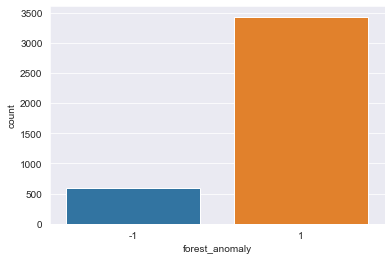

In [55]:
sns.countplot(data=data, x='forest_anomaly')
plt.show()

<AxesSubplot:xlabel='timestamp', ylabel='value'>

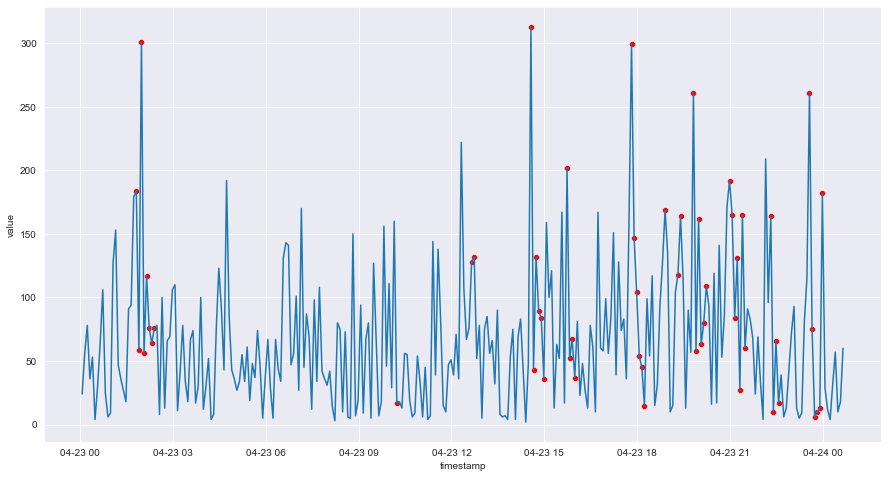

In [59]:
plt.figure(figsize=(15,8))
sns.lineplot(data=data[data['timestamp'] > '2014-04-23'] , x='timestamp', y='value')
sns.scatterplot(data=data[(data['timestamp'] > '2014-04-23') & (data['forest_anomaly'] == -1)] , x='timestamp', y='value', color='r')